# Pre-Data Collection

In [1]:

import pandas as pd
import os
import matplotlib.pyplot as plt

"""
The GTSRB Dataset is a collection of German traffic signs. This programm is a CNN to detect and classify
the signs.
"""

train_path = "//Users/soeren/Documents/Neuronale_Netze/Signs/GTSRB-2/Final_Training/Images"
test_path = "/Users/soeren/Documents/Neuronale_Netze/Signs/GTSRB/Final_Test/Images"
    
def sort_train_folder_numerically(train_dir):
    """
    train directory consists of multiple subfolders (= label)
    Sorts the train_directory numerically for GTSB Project
    """
    
    all_dirs = os.listdir(train_path)
    #there is one '.DS_Store file that is not a training folder'
    all_dirs.remove('.DS_Store')
    sorted_dirs = []
    #all folders are named '000xx' -> sort the accordingly
    for i in range(len(all_dirs)):
        number = str(i)
        if len(number) < 2:
            number = '0' + number
        sorted_dirs.append('000' + number)
        
    return sorted_dirs
        
all_elements = sort_train_folder_numerically(os.listdir(train_path))
print(all_elements)
print(len(os.listdir(os.path.join(train_path,all_elements[0]))))

['00000', '00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00020', '00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028', '00029', '00030', '00031', '00032', '00033', '00034', '00035', '00036', '00037', '00038', '00039', '00040', '00041', '00042']
212


# Data Collection: Mapping dictionary to source

In [2]:
import PIL
import glob
import matplotlib.pyplot as plt
from matplotlib import image as img
import numpy as np

#Saving data: training_dict{sample number as String: picture}


index = 0
training_dict = {}
valid_images = [".ppm"]
while index < len(all_elements):
    
    new_path = os.path.join(train_path, all_elements[index])
    sample = str(index)
    training_dict.update({sample: []})
    
    for picture_path in os.listdir(new_path):
        #get the ending of the picture path
        if picture_path[-3:] == "ppm":
            
            path = os.path.join(new_path,picture_path)
            training_dict[sample].append(path)
            
            
    index += 1
    
example = training_dict["2"]
print(type(example))
print(len(example))
#print(example)
print()
#print(training_data['42'])
print(len(training_dict))
print(type(training_dict['0']))
#training_data now contains all of the data in a dictionary, labelled by key

<class 'list'>
2250

43
<class 'list'>


# Labelling and standardizing (-> reduce to gray tones) the data

In [3]:
#training pictures should be 72x72 pixels
resized = 72

In [4]:
#Our labels
from skimage import io, color
from skimage.transform import resize

def split_test_training(dataset):
    #trying to split in 70 % Training, 30% Test; Validation is in another folder, unlabelled
    
    num_train = int(len(dataset) / 10 * 7) #int always rounds down
    
    training = dataset[:num_train]
    test = dataset[num_train:]
    
    return training, test
    
#create the training data
all_data = []
label = 0

while label < len(training_dict):
    local_label_index = 0
    
    while local_label_index < len(training_dict[str(label)]):
        img_array = color.rgb2gray(io.imread(training_dict[str(label)][local_label_index]))
        new_array = resize(img_array, (resized, resized))
        all_data.append([new_array, label]) 
        
        
        #Comments below for testing: should display one picture and then the same, resized to var resized x resized
        
        
        #plt.imshow(img_array)  # graph it
        #plt.show()  # display!
        #print(img_array.shape)
        
        #new_array = resize(img_array, (resized, resized), anti_aliasing = False)
        #plt.imshow(new_array)
        #plt.show()
        #print(new_array.shape)
        
        local_label_index += 1
        
        
    label += 1
    


# Shuffling and splitting the data

2250
39209


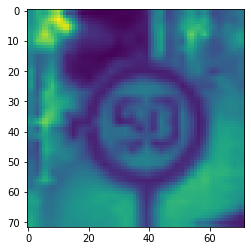

2



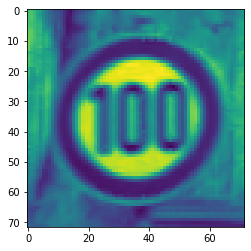

7



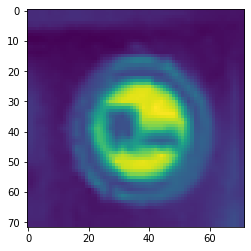

10



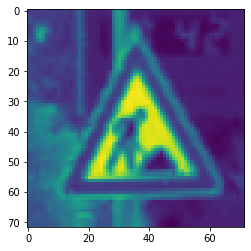

25



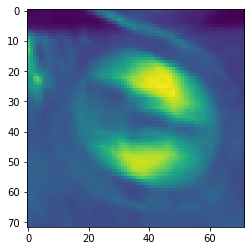

10



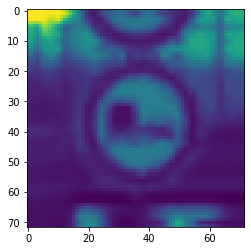

10



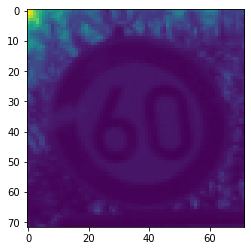

3



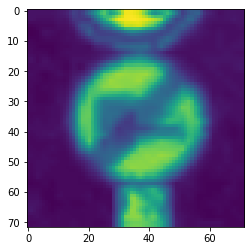

42



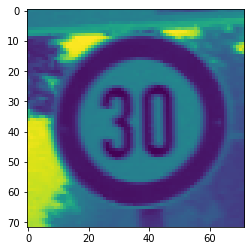

1



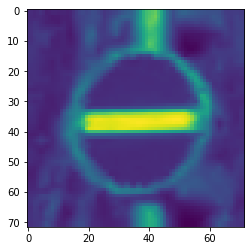

17



In [5]:
import random

random.shuffle(all_data)

insgesamt = 0

for element in all_data:
    if element[1] == 2:
        insgesamt += 1

print(insgesamt)
print(len(all_data))

training_data, test_data = split_test_training(all_data)

#for test purposes
#traing_data: [[img,class],[img,class],...,[img,class]] is all randomly shuffled

for sample in training_data[:10]:
    plt.imshow(sample[0])
    plt.show()
    print(sample[1])
    
    print()

# Final Prep before training

In [6]:
from tensorflow.keras.utils import to_categorical

X_test = []
Y_test = []
X_train = []
Y_train = []


for feature, label in training_data:
    X_train.append(feature)
    Y_train.append(label)
    
for feature, label in test_data:
    X_test.append(feature)
    Y_test.append(label)
    
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(X_train.shape)
X_train = np.array(X_train).reshape(-1, resized, resized, 1)
Y_train = to_categorical(Y_train)
print(X_train.shape)

X_test = np.array(X_test).reshape(-1, resized, resized, 1)
Y_test = to_categorical(Y_test)


(27446, 72, 72)
(27446, 72, 72, 1)


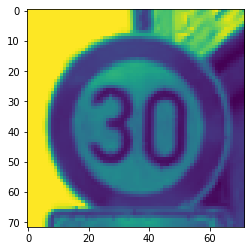

In [7]:
plt.imshow(X_train[20])
plt.show()

# Saving our data to hard drive

In [8]:
#Save everything, unnecessary in this case
#But could use pickle to load data in new script
#as the .pickle files are now in the Jupyter Projects folder

import pickle

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

# Loading our data from hard drive

In [9]:
import pickle
pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

X_train = X_train/255.0

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

X_test = X_test/255.0

In [10]:
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_train.shape)

(11763, 72, 72, 1)
(27446, 43)
(11763, 43)
(27446, 72, 72, 1)


In [11]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#if gpu available, you can switch to gpu.. see tensorflow docs

Num GPUs Available:  0


# Finally, our CNN

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

my_batch_size = 16
my_epochs = 80


model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation = 'relu', input_shape = (resized,resized,1)))
model.add(Conv2D(32,kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3), activation = 'relu'))
model.add(Conv2D(32,kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(43, activation = 'softmax'))
model.summary()
print()
print()

model.compile(optimizer='Adam',metrics = ['accuracy'], loss = 'categorical_crossentropy')
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size= my_batch_size,verbose = 1,epochs = my_epochs)

2021-11-06 20:33:17.996845: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 70, 70, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 68, 68, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                    

# Saving the model

In [ ]:
from tensorflow.keras import models
model.save("GTSRB_CNN.h5")

# Reimporting the model so we don't have to execute all the code above (for the future)

In [ ]:
from tensorflow.keras import models
model = models.load_model("GTSRB_CNN.h5")

# Verifying the model with unrelated data

# Dictionary to clearly be able to compare result with picture

In [ ]:
mapping_dictionary = {}
map_list = ['20 limit', '30 limit', '50 limit', '60 limit', '70 limit', '80 limit', 'no limit 80','100 limit',
            '120 limit', 'no overtaking, both cars', 'no overtaking left truck right car', 'right of way rocket',
            'right of way yellow and white', 'give way red and white', 'stop sign', 'limited access red and white circle', 
            'limited access red and white circle for trucks', 'do not pass red circle white bar',
            'attention triangle exclamation mark', 'attention triangle curve left', 'attention triangle curve right',
            'windy road ahead triangle', 'bumps ahead triangle', 'slippery road ahead triangle', 
            'narrow road triangle', 'construction triangle', 'attention traffic light', 'attention pedestrians',
            'attention child and parent running', 'attention bikes', 'attention snow', 'attention deer',
            'no limit white circle two grey bars', 'must turn right blue circle', 'must turn left blue circle',
            'must go straight blue circle', 'must go straight or right blue circle', 'must go straight or left blue circle',
            'must turn into here right blue circle', 'must turn into here left blue circle', 'roundabout',
            'no limit for no overtaking, both cars', 'no limit for no overtaking left truck right car']

#print(len(map_liste))

for i in range(len(map_liste)):
    mapping_dictionary.update({i: map_liste[i]})

#print(mapping_dictionary)

# Test

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

index = random.randint(0, len(test_data))
data = os.path.join(test_path, str(test_data[index]))

def prediction(model, data):
    img_array = color.rgb2gray(io.imread(data))
    img_array = resize(img_array, (50, 50))
    img_array = np.array(img_array).reshape(-1, 50, 50, 1)
    predict = model.predict(img_array)
    plt.imshow(img_array.reshape(50,50))
    plt.axis('off')
    plt.show()
    #print(predict)
    place = 0
    for i in np.nditer(predict):
        if i == 0:
            place += 1
        if i == 1:
            break
    return mapping_dictionary[place]

prediction(model,data)
